In [239]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

df = datasets.load_iris()

In [240]:
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [241]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [242]:
a = pd.DataFrame(df.data,columns=['sepal length',
 'sepal width',
 'petal length',
 'petal width'])

In [243]:
a.drop(["sepal length","sepal width"],axis=1,inplace=True)

In [244]:
a

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


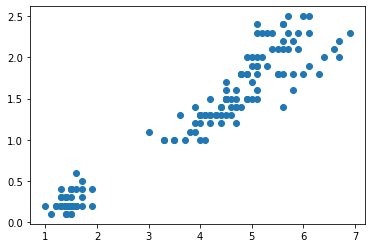

In [245]:
plt.scatter(a["petal length"],a["petal width"])

In [246]:
from sklearn.cluster import KMeans

In [247]:
b = KMeans(n_clusters=2)

In [248]:
c = b.fit_predict(a)
c[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [249]:
a["Clusters"]=c

In [250]:
a

,petal length,petal width,Clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [251]:
df1 = a[a.Clusters==0]

In [252]:
df2 = a[a.Clusters==1]

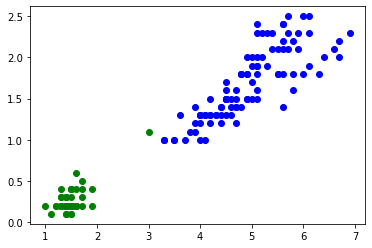

In [253]:
plt.scatter(df1["petal length"],df1["petal width"],color = "green")
plt.scatter(df2["petal length"],df2["petal width"],color = "blue")

In [254]:
#Here it is used to scale the features for better visualisation

In [255]:
from sklearn.preprocessing import MinMaxScaler

In [256]:
scale = MinMaxScaler()

In [257]:
scale.fit(a[["petal length"]])
a[["petal length"]]=scale.transform(a[["petal length"]])

scale.fit(a[["petal width"]])
a[["petal width"]]=scale.transform(a[["petal width"]])

In [258]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
nc = km.fit_predict(a[["petal length","petal width"]])

In [259]:
a["Cluster"] = nc
a.drop(["Clusters"],axis=1)

,petal length,petal width,Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [260]:
df1 = a[a.Clusters==0]

In [261]:
df2 = a[a.Clusters==1]

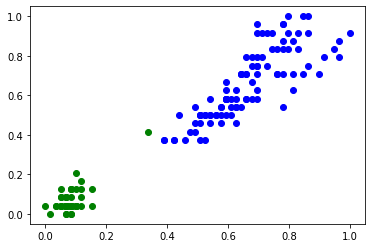

In [262]:
plt.scatter(df1["petal length"],df1["petal width"],color = "green")
plt.scatter(df2["petal length"],df2["petal width"],color = "blue")

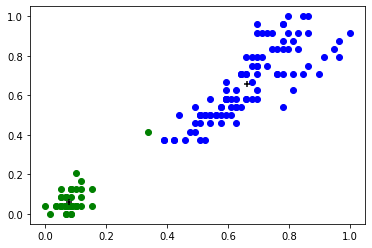

In [263]:
#Centroid is plotted

plt.scatter(df1["petal length"],df1["petal width"],color="green")
plt.scatter(df2["petal length"],df2["petal width"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="+")

In [264]:
# To get the elbow curve which is used to know the point where elbow cut happens that can be taken as K value
sse = []
k = range(1,10)
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(a[["petal length","petal width"]])
    sse.append(km.inertia_)

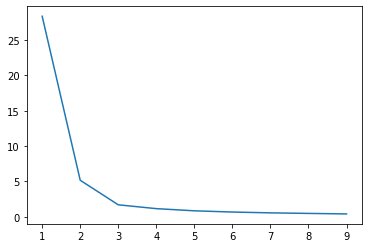

In [265]:
plt.plot(k,sse)

In [236]:
# we can see the elbow is at point k=2 so we take k=2 as our assumption